In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import os

import scores


# Reading in the Data

In [2]:
path_f=os.getcwd()

path_f_1=os.path.join(path_f, 'data')


names=[]
for files_txts in os.listdir(path_f_1):
    if files_txts.endswith(".csv"):
        #print(files_txts)
        names.append(files_txts)
        
path_train=os.path.join(path_f_1, names[0])
path_test=os.path.join(path_f_1, names[1])

df_train=pd.read_csv(path_train)
df_train.shape

(2572, 99)

Manipulating the data to enable application of ML

In [3]:
#Transforming the outcome to a numpy vector
stab_vector=df_train['stabilityVec'].values
y=[]
for x in stab_vector:
    #print(x)
    a=np.fromstring(x[1:-1],sep=',').astype(int)
    y.append(a)
y=np.array(y) 

df_tmp = pd.DataFrame(y, columns = ['A', 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B','B'])
stab_vec_list=[ 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B']

df_train=df_train.drop("stabilityVec",axis=1) #removing the results which originally are a string
feature_cols=list(df_train)


print(df_train.shape)

#Transforming the Formulas to integers
csvfile = csv.reader(open(path_train,'r'))
header = next(csvfile)

formulaA = []
formulaB = []

for row in csvfile:
    formulaA.append(row[0])
    formulaB.append(row[1])
formulas = formulaA + formulaB
formulas = list(set(formulas))

# -- /!\ need to save the dict as the ordering may difer at each run
formula2int = {}
int2formula = {}
for i, f in enumerate(formulas):
    formula2int[f] = i
    int2formula[i] = f

formulaAint = np.array([formula2int[x] for x in formulaA])
formulaBint = np.array([formula2int[x] for x in formulaB])

df_train['formulaA']=formulaAint
df_train['formulaB']=formulaBint

df_train=pd.concat([df_train, df_tmp],axis=1)
df_train.shape

(2572, 98)


(2572, 109)

## Data Analysis
 - Output

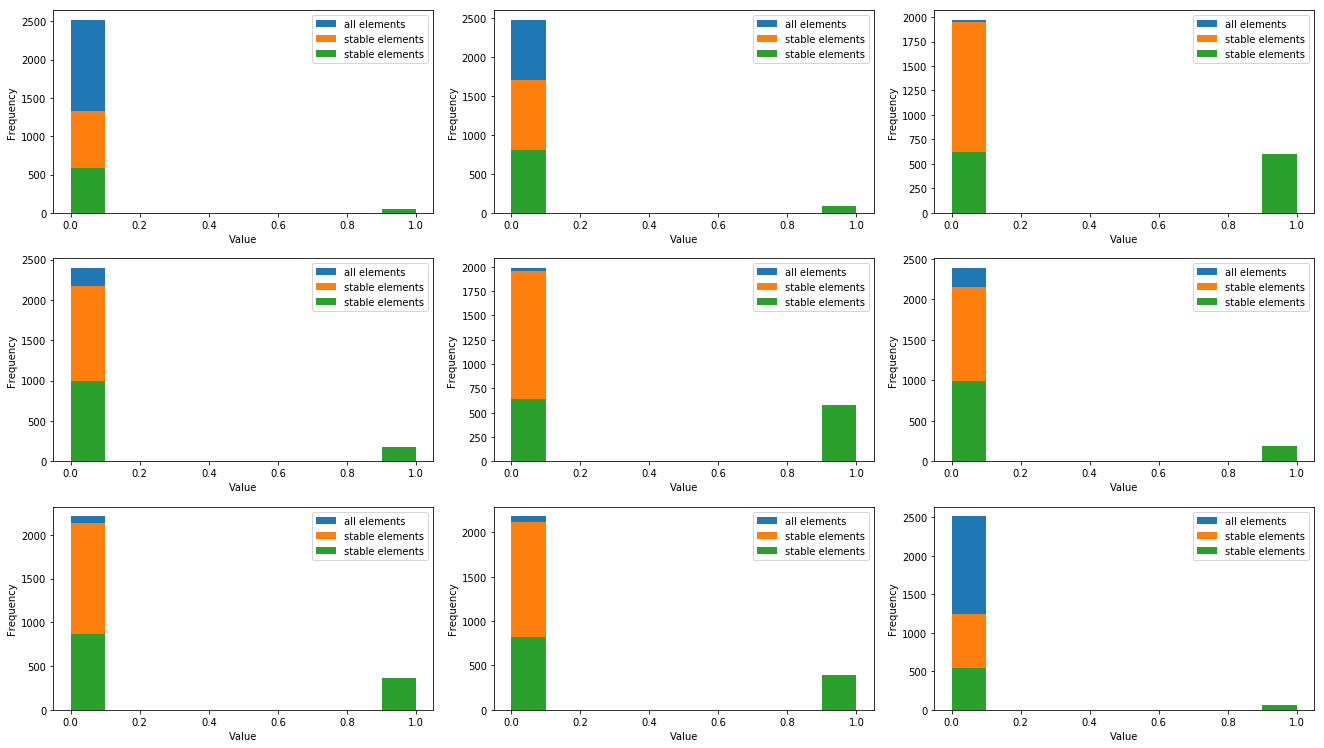

In [4]:
## Observing how many element pairs produce a stable compound per % and overall
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_all=df_train[stab_vec_list]

for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    #print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='all elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    
    
    

#for count in range(9):

    #y = df_train[stab_vec_list[count]]
    stable_comp=df_train.loc[y==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)
        #print(df_tmp.shape)
        #print(df_unique.shape)
    
    #print(y_unique.shape)

    for cnt in range(stable_B.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)

    
    y_unique=y.iloc[y_unique.index.unique()]
    ax.hist(y_unique.values, bins=10, label='stable elements')
    #print(y_unique.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    
    y_stable=y_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
    ax.hist(y_stable.values, bins=10, label='stable elements')
    #print(y_stable.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')
    
    
    ax.legend(loc='upper right')

    


plt.tight_layout()

## First we will build a model to determine if the input elements will produce at least one stable compound

In [5]:
y = df_train[stab_vec_list]
print(y.sum(axis=1).value_counts())


print('These are example of elements that produce no stable compounds')

(df_train.loc[y_all.sum(axis=1)==0].head())

0    1344
1     482
2     369
3     259
4      96
5      20
6       2
dtype: int64
These are example of elements that produce no stable compounds


,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A91B,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B
2,45,4,37.433086,21.723966,227.0,74.9216,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,0,1
3,45,59,37.433086,64.969282,227.0,137.3270,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,0,1
4,45,12,37.433086,35.483459,227.0,208.9804,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,0,1
6,45,1,37.433086,8.825090,227.0,12.0107,3473.0,4300.0,0.0,33.0,...,0,0,0,0,0,0,0,0,0,1
7,45,79,37.433086,42.937187,227.0,40.0780,3473.0,1757.0,0.0,17.0,...,0,0,0,0,0,0,0,0,0,1


## Data Vizualization

In [6]:
X = df_train[feature_cols]

from sklearn.preprocessing import normalize

X_norm = normalize(X, axis=1)



from scipy.stats import zscore

X_norm_zscore=X.apply(zscore)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_norm_0_1=min_max_scaler.fit_transform(X)


top 10 explained variance:  [0.09584012 0.08452746 0.05184492 0.04871553 0.03646    0.01696557
 0.01548112 0.00906688 0.00633613 0.00195563]
(2572, 20)


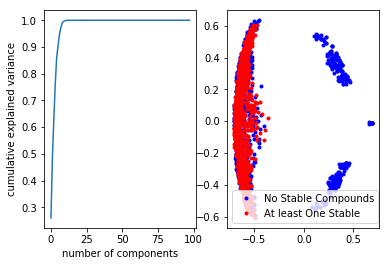

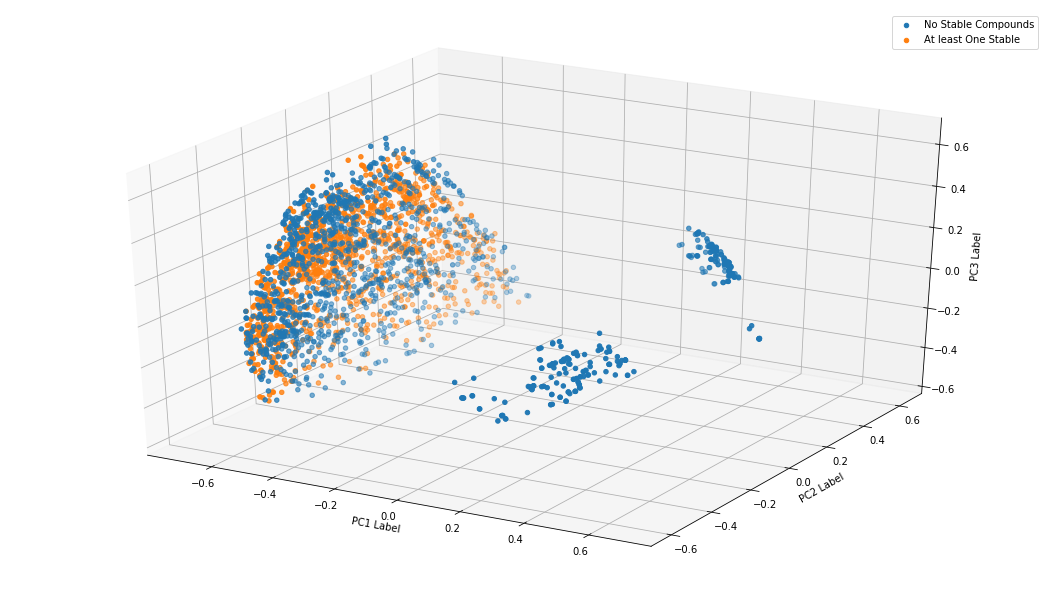

In [7]:
#Visualiziting the input using PCA

f, (ax1, ax2) = plt.subplots(1, 2)
pca = PCA()

pca.fit(X_norm)

explained_var = pca.explained_variance_
print('top 10 explained variance: ', explained_var[:10])

#pca = PCA().fit(digits.data)
ax1.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.set_xlabel('number of components')
ax1.set_ylabel('cumulative explained variance');

components = pca.components_[:20,:]

new_data = np.dot(X_norm, components.T)
print(new_data.shape)

indexes_0 = y_all.sum(axis=1)==0
indexes_1=np.logical_not(indexes_0)
ax2.plot(new_data[indexes_0,0], new_data[indexes_0,1], 'b.', linestyle='', label='No Stable Compounds')
ax2.plot(new_data[indexes_1,0], new_data[indexes_1,1], 'r.', linestyle='', label='At least One Stable ')

plt.legend()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')



ax.scatter(new_data[indexes_0,0], new_data[indexes_0,1], new_data[indexes_0,2], label='No Stable Compounds')
ax.scatter(new_data[indexes_1,0], new_data[indexes_1,1], new_data[indexes_1,2], label='At least One Stable ')

ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')
ax.legend()
plt.show()

In [8]:
df_tmp_stable = pd.DataFrame( columns = ['Stable_compunds'])
df_tmp_stable['Stable_compunds']=np.logical_not(y_all.sum(axis=1)==0).astype(int) ## A one means it has a stable value  a 0 

df_train=pd.concat([df_train, df_tmp_stable],axis=1)

In [9]:
## Using Un-normalized data as input
X_train_new=df_train[feature_cols]
y_new=df_tmp_stable['Stable_compunds']
print(X_train_new.shape)
print(y_new.shape)

# Using PCA as input
X_train_new_PCA=new_data
print(X_train_new_PCA.shape)


# Normalizing such that the magnitude is one
X_train_new_mag_1=X_norm # vector magnitude is one
print(X_train_new_mag_1.shape)


## Normalizing by Zscore
from scipy.stats import zscore
X_train_new_Z_score=X_train_new.apply(zscore)
print(X_train_new_Z_score.shape)


## Normalizing by Zscore and then 0-1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_new_Z_0_1=min_max_scaler.fit_transform(X_train_new_Z_score)
print(X_train_new_Z_0_1.shape)


## Normalizing so that range is 0-1
X_train_new_0_1=min_max_scaler.fit_transform(X_train_new)
print(X_train_new_0_1.shape)


## Normalizing so that range is -1 to 1
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_new_m1_p1=max_abs_scaler.fit_transform(X_train_new)
print(X_train_new_m1_p1.shape)






(2572, 98)
(2572,)
(2572, 20)
(2572, 98)
(2572, 98)
(2572, 98)
(2572, 98)
(2572, 98)


In [10]:
## test-train split
X_train, X_test, y_train, y_test = train_test_split(X_train_new_m1_p1, y_new,
                                                    test_size=.3,
                                                    shuffle=True,
                                                    random_state=42)



In [17]:
# Using gridsearchCV for Hyper Parameter Tuning -- Example Random Forest

print(' -- Random Forest --')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)


# Using Cross Validation

from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10) 

print(all_accuracies)  
print(all_accuracies.mean())  
print(all_accuracies.std())  

# Defining the Grid

from sklearn.model_selection import GridSearchCV  

grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth':[1, 5, 10, 20]
}

gd_sr = GridSearchCV(estimator=rfc,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_  
print(best_parameters) 
best_result = gd_sr.best_score_  
print(best_result) 

 -- Random Forest --
[0.82320442 0.76243094 0.79558011 0.85082873 0.85       0.85555556
 0.83798883 0.83798883 0.84357542 0.83240223]
0.8289555061713154
0.02755032636068158
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
0.8972222222222223


In [11]:
#Using a wrapper around GridSearchCV
print(' -- Random Forest --')
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}



grid_search_clf=scores.grid_search_wrapper(X_train,y_train,X_test,y_test,rfc,param_grid,scorers,10,refit_score='precision_score')

 -- Random Forest --
Best params for precision_score
{'max_depth': 25, 'max_features': 10, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg       347        61
pos        34       330


In [12]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
86,0.874,0.912,0.894,25,10,5,100
66,0.869,0.913,0.892,15,20,3,100
78,0.869,0.918,0.894,25,5,3,100
85,0.868,0.918,0.893,25,10,3,300
92,0.868,0.917,0.893,25,20,5,100


In [15]:
# test with random forest
print(' -- Random Forest --')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,criterion='gini', max_depth=5, random_state=0, bootstrap=True)


rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)

 -- Random Forest --
precision:  0.7384615384615385   recall:  0.9230769230769231   F1:  0.8205128205128206   accuracy:  0.8095854922279793
Confusion matrix
[[289 119]
 [ 28 336]]


In [24]:
from sklearn.metrics import roc_curve, auc
base_model = RandomForestClassifier(n_estimators=1000,criterion='gini', max_depth=5, random_state=0, bootstrap=True)
base_model.fit(X_train, y_train)

base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:',roc_auc)

best_model = gd_sr.best_estimator_
best_model.fit(X_train, y_train)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:',roc_auc)

precision:  0.7384615384615385   recall:  0.9230769230769231   F1:  0.8205128205128206   accuracy:  0.8095854922279793
Confusion matrix
[[289 119]
 [ 28 336]]
AUC: 0.8157051282051282
precision:  0.8354430379746836   recall:  0.9065934065934066   F1:  0.8695652173913044   accuracy:  0.8717616580310881
Confusion matrix
[[343  65]
 [ 34 330]]
AUC: 0.8736398405516052


In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8736398405516052


In [42]:
# Logistic Regression
print(' -- Logistic Regression --')
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)


 -- Logistic Regression --
precision:  0.748780487804878   recall:  0.7713567839195979   F1:  0.7599009900990099   accuracy:  0.7714958775029447
Confusion matrix
[[348 103]
 [ 91 307]]


In [43]:
# -- test with KNN
print(' -- KNN --')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)

 -- KNN --
precision:  0.8226950354609929   recall:  0.8743718592964824   F1:  0.8477466504263095   accuracy:  0.8527679623085983
Confusion matrix
[[376  75]
 [ 50 348]]


In [45]:
# test with Support Vector Machines
print(' -- Support Vector Machines --')
import sklearn.svm
svc_c = sklearn.svm.SVC()
svc_c.fit(X_train, y_train)
y_pred = svc_c.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)

 -- Support Vector Machines --
precision:  0.7404761904761905   recall:  0.7814070351758794   F1:  0.7603911980440098   accuracy:  0.7691401648998822
Confusion matrix
[[342 109]
 [ 87 311]]


In [53]:
# test with Decision Trees
print(' -- Decision Trees --')
import sklearn.tree
#criterion={'gini','entropy'}
#splitter={'best','random'}
decission_c = sklearn.tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                                                   max_features=None, max_leaf_nodes=None,min_samples_leaf=1,
                                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                                   presort=False, random_state=None, splitter='random')
decission_c.fit(X_train, y_train)
y_pred = decission_c.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)


 -- Decision Trees --
precision:  0.8080568720379147   recall:  0.8567839195979899   F1:  0.8317073170731707   accuracy:  0.8374558303886925
Confusion matrix
[[370  81]
 [ 57 341]]


In [47]:
# test with Naive Bayes
print(' -- Naive Bayes --')
import sklearn.naive_bayes
naive_B_c = sklearn.naive_bayes.GaussianNB()
naive_B_c.fit(X_train, y_train)
y_pred = naive_B_c.predict(X_test)

precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)
print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Confusion matrix')
print(confusion)


 -- Naive Bayes --
precision:  0.5578635014836796   recall:  0.9447236180904522   F1:  0.7014925373134328   accuracy:  0.6230859835100118
Confusion matrix
[[153 298]
 [ 22 376]]
